## 識別器に関して
https://qiita.com/ishizakiiii/items/0650723cc2b4eef2c1cf
* ロジスティック回帰に関して  
→ロジスティック回帰は0~1までの範囲に収まる時の予測・分析をしたい時に使用するとよい  
→具体的には確率を予測したりするときなど。  
→sklearnではデフォルトで他クラス分類に対してautoで対応できるようになっている.（性能が良くなっている？？）'auto'の場合、多項式損失を使用している。  
→https://ai-trend.jp/basic-study/regression/logistic_regression/  

* KNN法  
KNN法は分類と回帰両方とも使用することができる。    
kNNでは既存のデータを覚えておき、未知のデータと似ている既存のデータを利用する単純なアルゴリズム    
・kNNのアルゴリズム    
既存のデータ(学習データ)をベクトル空間にプロット    
未知データと既存データの距離を計算する    
未知データと近いデータをk個抽出する    
抽出したk個のデータで多数決をして、結果として出力する    

値分類のときはkを奇数にして多数決が同点にならないようにする！    
高次元のもの、データ量が大きいものに関してはうまくいかないといったことがあるので、注意が必要になる。    

.RadiusNeighborsClassifierという識別器も存在し、これは半径を指定してその半径の中にあるデータから確認するというもの。  
→半径に関しては特徴量によって異なってくることから、データを標準化なりスケーリングする必要がある。  
→https://qiita.com/Tokky0425/items/d28021eb1c2a710ec9f9  
→https://nisshingeppo.com/ai/knn/  


* パーセプトロンに関して  
うまく判別することができる（誤差関数が小さくなる）まで重みを更新していくというもの。  
線型分離ができるものに適している。線型分離不能に関しては、ニューラルネットワークを使用することで対応することは可能。  
→https://tech-lab.sios.jp/archives/20705  
→https://rightcode.co.jp/blog/information-technology/simple-perceptron  

* サポートベクターマシーン  
→サポートの範囲を出来るだけ大きくなるように線を引くようにしている、  
→なおかつそのサポートの中にデータが入らないようにしている。  
→サポートベクトルマシーンではマージンの最大化を考える。（マージンとは、「判別する境界とデータとの距離」のこと）  
→境界線と最も近くにあるデータを「サポートベクトル」と呼ぶ  
→A種かB種かはっきり分かれることを前提としたマージンを「ハードマージン」と呼ぶ  
→誤判別を許すことを前提としたマージンのことを「ソフトマージン」と呼ぶ  
ソフトマージンは以下の値を最小化するようにする。  
→min{1/マージン（サポートベクトルと境界線の距離）+C×誤判別数}  
このパラメータCはどこまで許容を許すのか？というもの。パラメタCが大きければ、誤判別は決して許さないし、逆にCが小さければ、誤判別はあまり気にしない。  
→https://logics-of-blue.com/svm-concept/  

非線形の場合  
→rbfを使用することが多い。  

カーネルトリックとは…分析したいデータの次元数を上げて単純な形に変えることでデータ分析しやすくなるもののこと  
→次元を変えてしまうので特徴量が何であるかを知ることはできなくなる。  
→https://mi-chan-nel.com/kernel-method/  
→https://nisshingeppo.com/ai/kernel-method/  
sklearnのSVMで確率を実装する場合はprobbabilityをTrueにしないと求めることができない。  
  
* ランダムフォレストに関して
アンサンブル学習  
→複数の機械学習モデルを組み合わせることで、より強力なモデルを構築するやり方  
→複数の機械学習モデルの判断結果から多数決で、最終的に判断を下す学習の仕方  
・バギング（ランダムフォレストがこれに当たる。）  
→バギングは、並列的に弱学習器を用いてそれぞれのモデルの総合的な結果を用いるという手法  
→訓練データに対していくつも決定木モデルを作成し、それぞれの結果を集約して最終結果を出力  
ランダムフォレストとは、アンサンブル学習のバギングをベースに、少しずつ異なる決定木をたくさん集めたもの  
  
・ブースティング  
→直列的に弱学習器を用いていく  
→最初の弱学習器で上手く推定できなかった部分を推定するために重みを付けて次の弱学習器で学習を行う。  
ブースティングの手法として  
→LightGBM  
→XGBoost  
ランダムフォレスト  
→https://qiita.com/Hawaii/items/5831e667723b66b46fba  
アンサンブル  
→https://toukei-lab.com/ensemble  
LightGBM  
→https://qiita.com/triwave33/items/aad60f25485a4595b5c8  

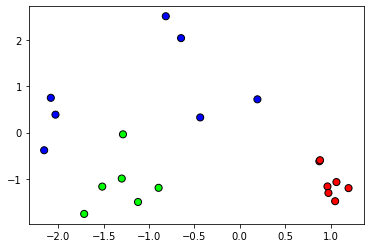

In [1]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=20, # 20個生成
                           n_features=2, # 2次元
                           n_classes=3, # 3クラス
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           random_state=8   # 乱数種（再現用）
                           )
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.brg);
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [8]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


def plotBoundary2(X, clf, boundary=True):
    colors = ['k'];
    linestyles = ['-'];
    levels = [0];

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape

        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels) # draw lines (level=0:boundary)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

## ロジスティック回帰

/tmp/ipykernel_13/3251268481.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


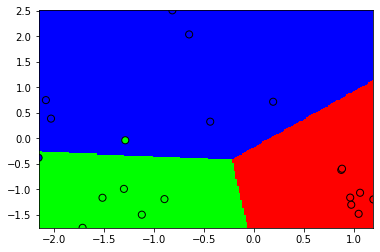

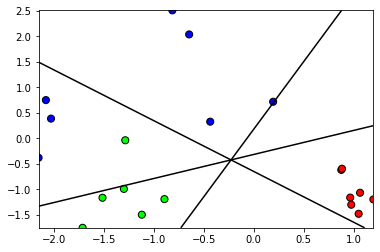

In [10]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X, clf)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary2(X, clf)

In [13]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### KNN法
KNN法は分類と回帰両方とも使用することができる。  
kNNでは既存のデータを覚えておき、未知のデータと似ている既存のデータを利用する単純なアルゴリズム  
・kNNのアルゴリズム  
既存のデータ(学習データ)をベクトル空間にプロット  
未知データと既存データの距離を計算する  
未知データと近いデータをk個抽出する  
抽出したk個のデータで多数決をして、結果として出力する  

値分類のときはkを奇数にして多数決が同点にならないようにする！  
高次元のもの、データ量が大きいものに関してはうまくいかないといったことがあるので、注意が必要になる。  
→https://qiita.com/Tokky0425/items/d28021eb1c2a710ec9f9
→https://nisshingeppo.com/ai/knn/

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心2個
                  cluster_std = .8, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap(plt.cm.gist_ncar)

<Figure size 432x288 with 0 Axes>

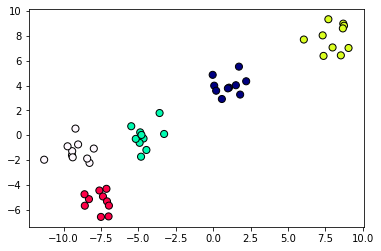

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [5]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [6]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

/tmp/ipykernel_30/1975832516.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


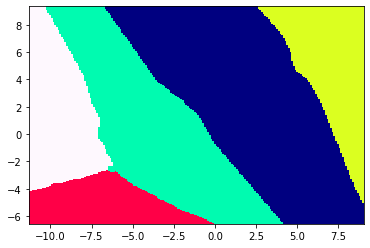

In [8]:
clf.fit(X,y)
plt.scatter(X[:,0] , X[:,1], marker = 'o' , s=50 , c=y)
plotBoundary(X, clf) # 境界線の描画

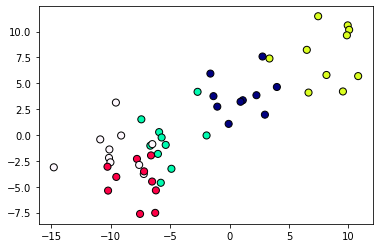

In [9]:
X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

/tmp/ipykernel_30/1975832516.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


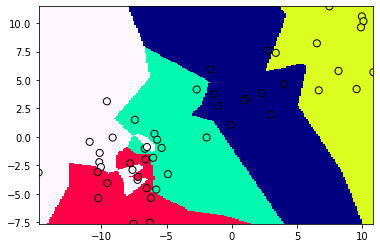

In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

/tmp/ipykernel_30/1975832516.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


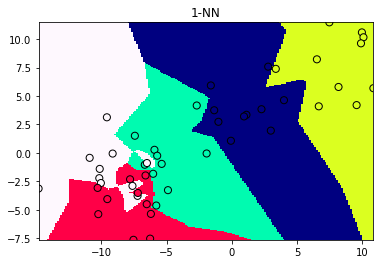

/tmp/ipykernel_30/1975832516.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


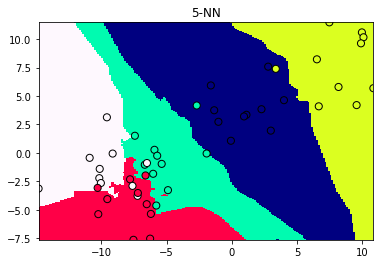

/tmp/ipykernel_30/1975832516.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


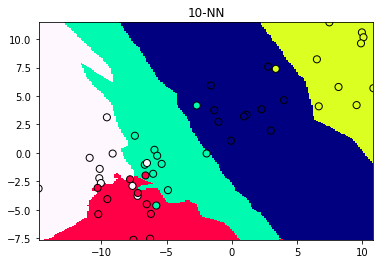

/tmp/ipykernel_30/1975832516.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


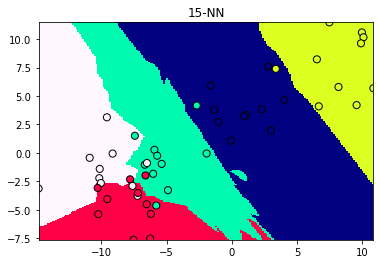

In [11]:
for n in [1, 5, 10, 15]:
    clf.n_neighbors = n
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("{0}-NN".format(n))
    plt.show()

In [12]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [13]:
clf = neighbors.RadiusNeighborsClassifier()
clf.fit(X_train, y_train)

RadiusNeighborsClassifier()

In [14]:
clf.score(X_train, y_train)

0.825

### パーセプトロンに関して
うまく判別することができる（誤差関数が小さくなる）まで重みを更新していくというもの。
線型分離ができるものに適している。線型分離不能に関しては、ニューラルネットワークを使用することで対応することは可能。
→https://tech-lab.sios.jp/archives/20705
→https://rightcode.co.jp/blog/information-technology/simple-perceptron

In [16]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf

Perceptron()

/tmp/ipykernel_30/1975832516.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)


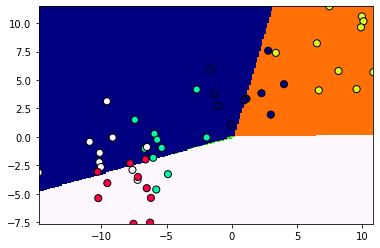

In [17]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

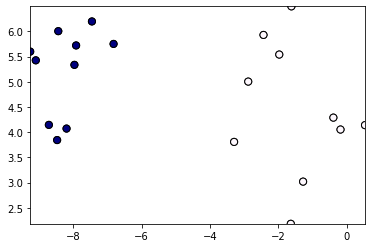

In [20]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

# これをTrueにすることによって以前学習していたものを使用している。
clf.warm_start = True

for s in range(10):

    clf.random_state = s
    
    clf.fit(X,y)

    plotBoundary(X, clf, mesh=False)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [22]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [23]:
clf = Perceptron() # default max_iter=5
clf.fit(X_train, y_train) # no scaling
clf.score(X_test, y_test)

0.6491228070175439

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

1 0.41228070175438597
2 0.4824561403508772
3 0.5789473684210527
4 0.5877192982456141
5 0.5964912280701754
6 0.6052631578947368
7 0.6140350877192983
8 0.6491228070175439
9 0.6491228070175439
10 0.6491228070175439
11 0.6578947368421053
12 0.8157894736842105
13 0.7105263157894737
14 0.7105263157894737
15 0.7280701754385965
16 0.7192982456140351
17 0.7192982456140351
18 0.8157894736842105
19 0.8157894736842105
20 0.7192982456140351
21 0.7280701754385965
22 0.7543859649122807
23 0.8157894736842105
24 0.7719298245614035
25 0.7894736842105263
26 0.7192982456140351
27 0.7719298245614035
28 0.7543859649122807
29 0.7719298245614035
30 0.7807017543859649
31 0.7631578947368421
32 0.7719298245614035
33 0.7807017543859649
34 0.7807017543859649
35 0.7807017543859649
36 0.8157894736842105
37 0.7631578947368421
38 0.7807017543859649
39 0.8157894736842105
40 0.7543859649122807
41 0.7719298245614035
42 0.7631578947368421
43 0.7719298245614035
44 0.8157894736842105
45 0.7719298245614035
46 0.8070175438596

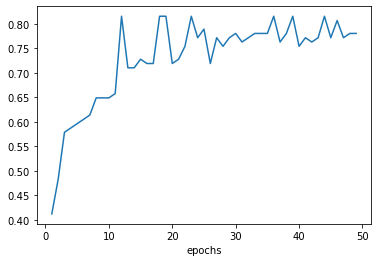

In [24]:
# clf = Perceptron(warm_start=True, n_iter=1)
clf = Perceptron(warm_start=True, max_iter=1)

scores = []
n_range = range(1,50)
for n in n_range:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(n, score)
    scores.append(score)
scores = np.array(scores)

plt.plot(n_range, scores)
plt.xlabel("epochs")
plt.show()

In [25]:
# スケーリングして行ってみる
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

1 0.9122807017543859
2 0.9473684210526315
3 0.8245614035087719
4 0.8245614035087719
5 0.8596491228070176
6 0.8333333333333334
7 0.8333333333333334
8 0.9122807017543859
9 0.9736842105263158
10 0.9649122807017544
11 0.9649122807017544
12 0.9385964912280702
13 0.9649122807017544
14 0.9649122807017544
15 0.9649122807017544
16 0.9736842105263158
17 0.9649122807017544
18 0.9649122807017544
19 0.956140350877193
20 0.9035087719298246
21 0.9649122807017544
22 0.9649122807017544
23 0.9736842105263158
24 0.9736842105263158
25 0.956140350877193
26 0.956140350877193
27 0.9736842105263158
28 0.9824561403508771
29 0.9824561403508771
30 0.9736842105263158
31 0.9824561403508771
32 0.9824561403508771
33 0.956140350877193
34 0.956140350877193
35 0.9824561403508771
36 0.9473684210526315
37 0.9385964912280702
38 0.9736842105263158
39 0.956140350877193
40 0.9649122807017544
41 0.9649122807017544
42 0.9122807017543859
43 0.9298245614035088
44 0.9298245614035088
45 0.956140350877193
46 0.9298245614035088
47 0

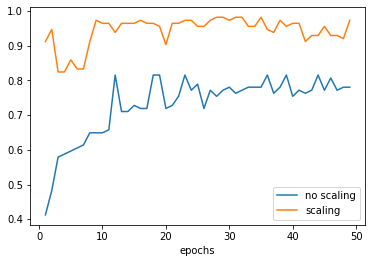

In [26]:
# スケーリングをすることによってうまく判別している。
clf = Perceptron(warm_start=True, max_iter=1)

scores2 = []
n_range = range(1,50)
for n in n_range:
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print(n, score)
    scores2.append(score)
scores2 = np.array(scores2)

plt.plot(n_range, scores, label="no scaling")
plt.plot(n_range, scores2, label="scaling")
plt.legend(loc="best")
plt.xlabel("epochs")
plt.show()

## サポートベクターマシーン
→サポートの範囲を出来るだけ大きくなるように線を引くようにしている、
→なおかつそのサポートの中にデータが入らないようにしている。
→サポートベクトルマシーンではマージンの最大化を考える。（マージンとは、「判別する境界とデータとの距離」のこと）
→境界線と最も近くにあるデータを「サポートベクトル」と呼ぶ
→A種かB種かはっきり分かれることを前提としたマージンを「ハードマージン」と呼ぶ
→誤判別を許すことを前提としたマージンのことを「ソフトマージン」と呼ぶ
ソフトマージンは以下の値を最小化するようにする。
→min{1/マージン（サポートベクトルと境界線の距離）+C×誤判別数}
このパラメータCはどこまで許容を許すのか？というもの。パラメタCが大きければ、誤判別は決して許さないし、逆にCが小さければ、誤判別はあまり気にしない。
→https://logics-of-blue.com/svm-concept/

非線形の場合
→rbfを使用することが多い。

カーネルトリックとは…分析したいデータの次元数を上げて単純な形に変えることでデータ分析しやすくなるもののこと
→次元を変えてしまうので特徴量が何であるかを知ることはできなくなる。
→https://mi-chan-nel.com/kernel-method/
→https://nisshingeppo.com/ai/kernel-method/
sklearnのSVMで確率を実装する場合はprobbabilityをTrueにしないと求めることができない。

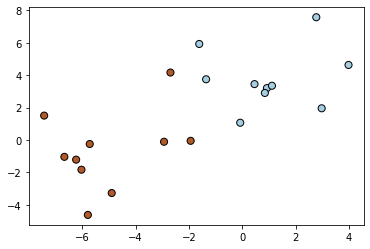

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])

    if boundary:
        level = [0.5]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [2]:
from sklearn.svm import SVC
# 線形の場合
clf = SVC(kernel='linear')

/tmp/ipykernel_12/1323656781.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10)


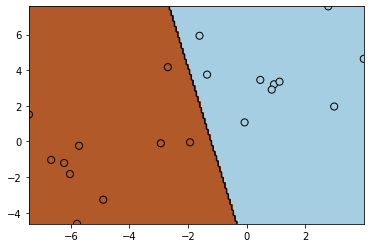

In [3]:
clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

### ランダムフォレストに関して
アンサンブル学習
→複数の機械学習モデルを組み合わせることで、より強力なモデルを構築するやり方
→複数の機械学習モデルの判断結果から多数決で、最終的に判断を下す学習の仕方
・バギング（ランダムフォレストがこれに当たる。）
→バギングは、並列的に弱学習器を用いてそれぞれのモデルの総合的な結果を用いるという手法
→訓練データに対していくつも決定木モデルを作成し、それぞれの結果を集約して最終結果を出力
ランダムフォレストとは、アンサンブル学習のバギングをベースに、少しずつ異なる決定木をたくさん集めたもの
ランダムフォレストは、決定木の数、木の深さ、使用する特徴量などのパラメータを自分自身で設定する必要がある。


・ブースティング
→直列的に弱学習器を用いていく
→最初の弱学習器で上手く推定できなかった部分を推定するために重みを付けて次の弱学習器で学習を行う。
ブースティングの手法として
→LightGBM
→XGBoost
ランダムフォレスト
→https://qiita.com/Hawaii/items/5831e667723b66b46fba
アンサンブル
→https://toukei-lab.com/ensemble
LightGBM
→https://qiita.com/triwave33/items/aad60f25485a4595b5c8

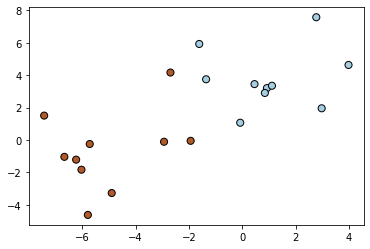

In [4]:

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=8)
clf.max_depth = 1

/tmp/ipykernel_12/1323656781.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10)


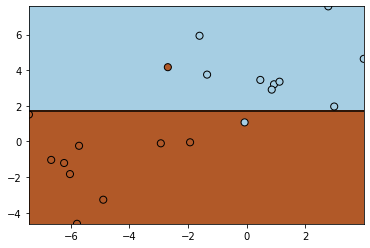

In [6]:
clf.n_estimators=1

clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
plotBoundary(X, clf)

/tmp/ipykernel_12/1323656781.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, zorder=-10)


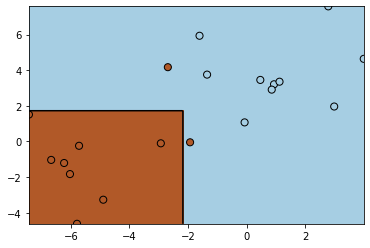

In [7]:
clf.n_estimators=2

clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
plotBoundary(X, clf)